# Predictive Analytics Primer
The lecture has introduced the standard data structure for predictive analytics. We need data with input variables and a **target variable**. The goal of predictive analytics is to derive a functional relationship between the input variables and the target. We assume that we can observe, measure, or control the input variables. Hence, our predictive model (the functional relationship between inputs and the target that we infer from past data), facilitates forecasting the expected value of the target variable based on the input variables. Whenever we observe a new case, we gather the values of the input variables for that case and feed them into our prediction model. Receiving that input, the model will produce a forecast of the target variable value for that case. So, predictive analytics is all about finding *good* **input-to-output mappings**. You can think of linear regression. Formally speaking, a linear regression function maps inputs $\boldsymbol x = {x_1, x_2, ..., x_d}$ from the domain $X \in  \mathbb{R}^d$ to the outputs $y \in  \mathbb{R}$. 

Recall from the lecture that many alternative terms are in use to refer to the input variables. Covariates, (independent) variables, attributes are only a few examples. In the interest of having consistent terminology, we will use the term **features** instead of input variables in the following. 

Here is the outline:
- (Linear) Regression

- Classification 


## Regression 

### Linear regression
Linear regression assumes a linear additive relationship between features and the target. Specifically, we assume a model:
$$ y = \beta_0 + \beta_1 x_1 +  \beta_2 x_2 + ... + \beta_m x_m + \epsilon $$
where $y$ is the target variable, $\beta$ denotes the regression coefficients (as usual), $x_j, j=1, ..., d$ are our features, and $\epsilon$ denotes the error term. Adopting the above perspective, when using linear regression, we assume we *know* the true functional form of the input-to-output mapping. Specifically, we assume this mapping to be linear and additive. Under this assumption, our task is to find the unknown parameters that characterize our mapping function, and these are the regression coefficients $\beta$. Some folks call models like linear regression **parametric models**. This is to emphasize that we assume to know the true functional form and then 'only' have to estimate that function's free parameters. Other methods like classification and regression trees work differently and are called **non-parametric models**. The form of such models (e.g., a classification tree) is not (assumed to be) known a priori. Rather, the task is to find that form; in other words determine it from the data.  


### Data Simulation for Regression

To warm-up, let's create some synthetic data for regression modeling. To keep things simple, we consider a univariate setting with only one feature. The classic example in business is that of a price response function, so we can assume that our single feature corresponds to the sales price of some product and our target to the sales of units of that product as some price.

In [1]:
# load relevant libraries

import random
import numpy as np
import matplotlib.pyplot as plt

np.set_printoptions(suppress=True)  # stops Python from producing output in scientific notation

random.seed(888) # for reproducibility

In [2]:
n = 100
X = np.random.randint(20,100,n)

X

array([69, 56, 69, 32, 48, 91, 20, 52, 61, 90, 56, 20, 42, 86, 52, 55, 69,
       59, 71, 78, 53, 20, 57, 81, 64, 91, 74, 41, 75, 85, 89, 34, 83, 48,
       43, 87, 74, 87, 21, 78, 87, 94, 79, 97, 83, 78, 92, 26, 30, 59, 71,
       79, 95, 31, 30, 24, 90, 65, 43, 64, 49, 57, 42, 22, 36, 69, 50, 49,
       75, 76, 73, 48, 36, 29, 80, 26, 46, 51, 89, 83, 87, 92, 42, 26, 74,
       67, 42, 89, 24, 72, 33, 28, 64, 69, 22, 49, 34, 70, 66, 89])

Next we need to create our target. Following the idea of linear regression, we create the target such that we set the regression parameters and claim these to be their *true values*, and then add some random noise. This is just 
$$ y = \beta_0 + \beta_1 x_1 +  \beta_2 x_2 + ... + \beta_m x_m + \epsilon $$ 

in Python, where $\epsilon$ is our random error, the noise that our regression model cannot explain. 

Below, we assume that the true beta is $-0.5$ and that the true intercept, i.e., $\beta_0$, is 100. Sticking to the price response function example, an intercept of 100 implies that we would 'sell' 100 units of the product if we give it away for free. Note how we use Python to configure the noise. How would you describe our noise term?

In [3]:
y = np.zeros(n) # create array of 0s of the length X

true_beta = -0.5
true_intercept = 100

for i in range(0, n):
  num = true_beta*X[i] + np.random.normal(0, 5, 1) # for this relationship, the true beta_1 = 0.5. Randomness also added.
  y[i] = true_intercept + num # replace 0s in y with the transformed X value

y= np.around(y, 2) # round all values to 2 decimals
y

array([64.  , 76.1 , 58.96, 75.39, 84.66, 57.37, 88.79, 70.11, 66.39,
       56.13, 76.2 , 91.22, 81.54, 52.02, 75.26, 70.51, 65.16, 65.53,
       66.03, 59.21, 68.98, 92.98, 72.24, 64.9 , 59.32, 56.68, 57.89,
       79.76, 67.91, 55.1 , 56.89, 77.08, 45.65, 76.09, 85.68, 55.35,
       67.13, 41.18, 83.75, 59.16, 58.95, 59.53, 63.79, 41.4 , 57.84,
       67.18, 54.66, 89.13, 86.58, 71.08, 65.89, 68.08, 47.21, 85.95,
       80.11, 87.53, 52.14, 74.91, 71.01, 59.5 , 82.36, 65.36, 80.62,
       93.29, 92.17, 72.24, 69.43, 80.35, 67.38, 63.81, 69.56, 72.19,
       83.53, 86.1 , 62.8 , 82.93, 64.26, 65.38, 53.11, 61.4 , 48.86,
       51.66, 83.79, 85.5 , 68.19, 69.79, 82.37, 52.62, 86.66, 50.65,
       78.92, 90.67, 65.66, 65.43, 87.69, 70.05, 80.37, 59.23, 70.35,
       50.75])

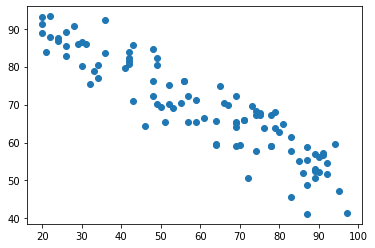

In [4]:
plt.scatter(X, y); # plot our X and y values on a scatterplot using pyplot

### Coefficient calculation

We know from our undergraduate studies how to compute our estimators $\hat \beta_0$ and $\hat \beta_1$ of the intercept and slope of our simple linear regression model, respectively. 

$$ \hat \beta_1 = \frac{\sum^{n}_{i=1}\left(x_i-\bar x \right) \left( y_i - \bar y\right)}{\sum^{n}_{i=1}\left(x_i-\bar x \right)^2} $$

$$ \hat \beta_0 = \bar y - \hat \beta_1 \bar x$$

where $\bar x$ and $\bar y$ denote the mean price (feature) and sales (target), respectively. 


In [5]:
# reshape dimensions 
X = X.reshape(-1, 1) # reshapes array to a vertical column (originally the shape is (100,), we need it to be (100,1))
y = y.reshape(-1, 1)
print(X.shape, y.shape)

(100, 1) (100, 1)


In [6]:
# the sklearn versin
from sklearn.linear_model import LinearRegression

lin = LinearRegression().fit(X, y)
beta_hat_0, beta_hat_1 = lin.intercept_, lin.coef_

print(beta_hat_0, beta_hat_1) # the

[100.09032673] [[-0.51220768]]


To more easily plot this line on a graph, let's calculate the value of `y` when `x = 100`. We already have the value of `y` when `x = 0`, which is $\beta_0$. After this, we can plot the data points and the line of best fit through the entire range of X.

In [7]:
y_val_x_at_100 = beta_hat_0 + beta_hat_1*100

print(y_val_x_at_100)

[[48.86955923]]


/Users/axelgk/miniconda3/envs/cs330/lib/python3.7/site-packages/numpy/core/_asarray.py:171: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return array(a, dtype, copy=False, order=order, subok=True)


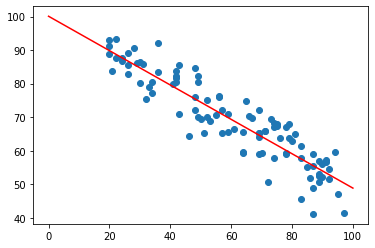

In [8]:
plt.scatter(X, y)
plt.plot([0, 100], [beta_hat_0, y_val_x_at_100],  color='red') # the first list are x coordinate values, the second are y values so this creates a line through (0, beta_hat_0) and (100, y_val_x_at_100)
plt.show()

### Predicting on new samples from the same population

Recall that the very point of predictive modeling is to forecast the value of the target variable for new cases. To demonstrate this, we can use the regression function just estimated, our model, and apply it to some novel data. We will first generate some new X values using the same random process and generate the corresponding y values using the same code. 

In [9]:
n_new = 10 # amount of new values to generate
X_new = np.random.randint(20, 100, size=n_new) # example using more efficient code to create a random array of integers
print(X_new)

[94 90 55 79 58 21 20 29 49 35]


In [10]:
y_true = np.zeros(n_new) # create array of 0s of the length X_new
for i in range(0, n_new):
  num = true_beta*X_new[i] + np.random.normal(0, 5, 1) # same relationship as before, true beta 1 is 0.5
  y_true[i] = true_intercept + num

y_true = np.around(y_true, 2) # round all values to 2 decimals
print(y_true)

[48.46 54.18 74.87 51.94 70.71 92.33 95.62 77.77 66.1  78.42]


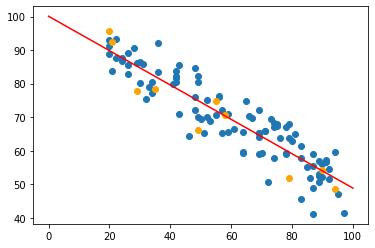

In [11]:
plt.scatter(X, y) # plot original points
plt.scatter(X_new, y_true, color='orange') # colour new points 
plt.plot([0, 100], [beta_hat_0, y_val_x_at_100], color='red') # pass line through coordinates (0, beta_hat_0) and (100, y_val_x_at_100)
plt.show()

We can now use our coefficients to predict the value of y for each of the new X values. Afterwards, it is a good idea to check the residuals or errors from the prediction to ensure that we are getting consistent results. We can then aggregate these values, the residuals, to obtain a single measure of performance like mean square error or root mean square error.

In [12]:
# use our model to predict the y value for the new X values:
y_pred = np.zeros(n_new)

for i in range(0, n_new):
  y_pred[i] = beta_hat_0 + beta_hat_1*X_new[i]
print(y_pred)

[51.94280528 53.99163598 71.91890461 59.6259204  70.38228158 89.33396556
 89.84617323 85.23630416 74.99215066 82.16305811]


In [13]:
# calculate residuals:
res = y_true - y_pred

print(res)

[-3.48280528  0.18836402  2.95109539 -7.6859204   0.32771842  2.99603444
  5.77382677 -7.46630416 -8.89215066 -3.74305811]


In [14]:
# root mean squared error:
pred_error = np.sqrt(np.mean(res**2))

print("RMSE of our regression model is {:.4}".format(pred_error))

RMSE of our regression model is 5.208


## Regression analysis based on Real Data: The Boston Housing Data Set
Let's now try the methods that we have been discussing on a real data set. Using `sklearn`, we can download some data which are ready for analysis. One of these data sets is called *Boston Housing*. In this dataset, we are given several characteristics (remember we call these features in machine learning) related to real estate properties. Our goal is to predict the cost of housing using these characteristics. The cost of housing in this case is called the target variable.

If you are curious to see the data and the interpretations of each variable, check the explanation of the data set here: http://lib.stat.cmu.edu/datasets/boston .


### Load the data set

We will first import the data set and check the first few rows to get a feeling for our data set. Being a standard data set for supervised ML, `sklearn` knows this data set and makes it available in the library `sklearn.datasets`. However, when loading data from that library, we need to account for the fact that `sklearn` stores the data in a specific way. We do not get a DataFrame right away. Some conversion is needed. You see below how this works. Think of the codes as a step that is needed to comply with the standards of `sklearn.datasets`. Also note that it is common practice to separate the target variable from the rest of the data. We adopt this approach and, to be consistent with the lecture, use the variable names $y$ and $X$ to refer to the array of target variable values and the feature matrix, respectively. 

### First glimpse at Train / Dev / Test splits of the data:  The holdout method

The train validation/dev test split is a technique for partitioning data into training, validation/development, and test sets.

The model is initially fit on a training data set, which is a set of examples used to fit the parameters (e.g. weights of connections between neurons in artificial neural networks) of the model. The model is trained on the training data set, for example using optimization methods such as gradient descent or stochastic gradient descent. 

Successively, the fitted model is used to predict the responses for the observations in a second data set called the validation data set or development data set. The validation data set provides an unbiased evaluation of a model fit on the training data set while tuning the model's hyperparameters (e.g. the number of hidden units—layers and layer widths—in a neural network). 

Finally, the test data set is a data set used to provide an unbiased evaluation of a final model fit on the training data set with hyperparameters tuned on the validation/development set. 

In case we sample only once and obtain one each of train, dev and test data sets, this is called the holdout method. This is totally fine for most applications, in specific, when model training is costly. More advanced schemes exist, the most prominent being the cross-validation approach. More on that later...


In [15]:
import sklearn.datasets as datasets
import pandas as pd
from sklearn.model_selection import train_test_split


df = datasets.load_boston()
print("What data type do we actually get from the library? Aha, this is a {}".format(type(df)))

# Extract target and featres and convert to DataFrame
pd_X = pd.DataFrame(data=df.data, columns=df.feature_names) # place input arrays into pandas DataFrame
pd_y = pd.DataFrame(data=df.target, columns=['Target']) # place target array into pandas DataFrame

X_traindev, X_test, y_traindev, y_test = train_test_split( pd_X, pd_y, test_size=0.2, random_state=42)
X_train, X_dev, y_train, y_dev = train_test_split( X_traindev, y_traindev, test_size=0.2, random_state=42)



X_train.head()  # eyeball the first 5 rows of the data set

What data type do we actually get from the library? Aha, this is a <class 'sklearn.utils.Bunch'>


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
54,0.01360,75.0,4.00,0.0,0.410,5.888,47.6,7.3197,3.0,469.0,21.1,396.90,14.80
28,0.77299,0.0,8.14,0.0,0.538,6.495,94.4,4.4547,4.0,307.0,21.0,387.94,12.80
423,7.05042,0.0,18.10,0.0,0.614,6.103,85.1,2.0218,24.0,666.0,20.2,2.52,23.29
244,0.20608,22.0,5.86,0.0,0.431,5.593,76.5,7.9549,7.0,330.0,19.1,372.49,12.50
111,0.10084,0.0,10.01,0.0,0.547,6.715,81.6,2.6775,6.0,432.0,17.8,395.59,10.16


In [16]:
print(X_train.shape)
print(X_dev.shape)
print(X_test.shape)
print(y_train.shape)
print(y_dev.shape)
print(y_test.shape)

(323, 13)
(81, 13)
(102, 13)
(323, 1)
(81, 1)
(102, 1)


In [17]:
y_train.head()  # same for the target

,Target
54,18.9
28,18.4
423,13.4
244,17.6
111,22.8


### Getting to know the data a little better
Again, the point is not to illustrate a fully-fledged explanatory data analysis in this notebook. Still, we need a basic understanding for the data. Below, you see some standard Pandas functions in action to:
- check if a data set has missing values -> `isnull()`
- get an overview of the data -> `info()`
- produce a set of descriptive statistics -> `describe()` 

In general, applying these functions will be the very first thing you do with any data that you get your hands on. More details in the next tutorial. 

In [18]:
pd_X.isnull().sum()  # any missing values

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
dtype: int64

In [19]:
pd_X.info()  # how many columns, what is their name and data type ?

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
dtypes: float64(13)
memory usage: 51.5 KB


In [20]:
pd_X.describe()  # descriptive statistics

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000


In [21]:
pd_y.describe()

,Target
count,506.000000
mean,22.532806
std,9.197104
min,5.000000
25%,17.025000
50%,21.200000
75%,25.000000
max,50.000000


### Feature and target distributions
Descriptive statistics are useful. Still, to examine the distribution of features or the target, graphs are preferable. Histograms are a great way to depict the distribution of numeric features. And we know from the previous call to `info()` that all features in the Boston Housing data set are numeric. So let's look at a histogram for each of the features.

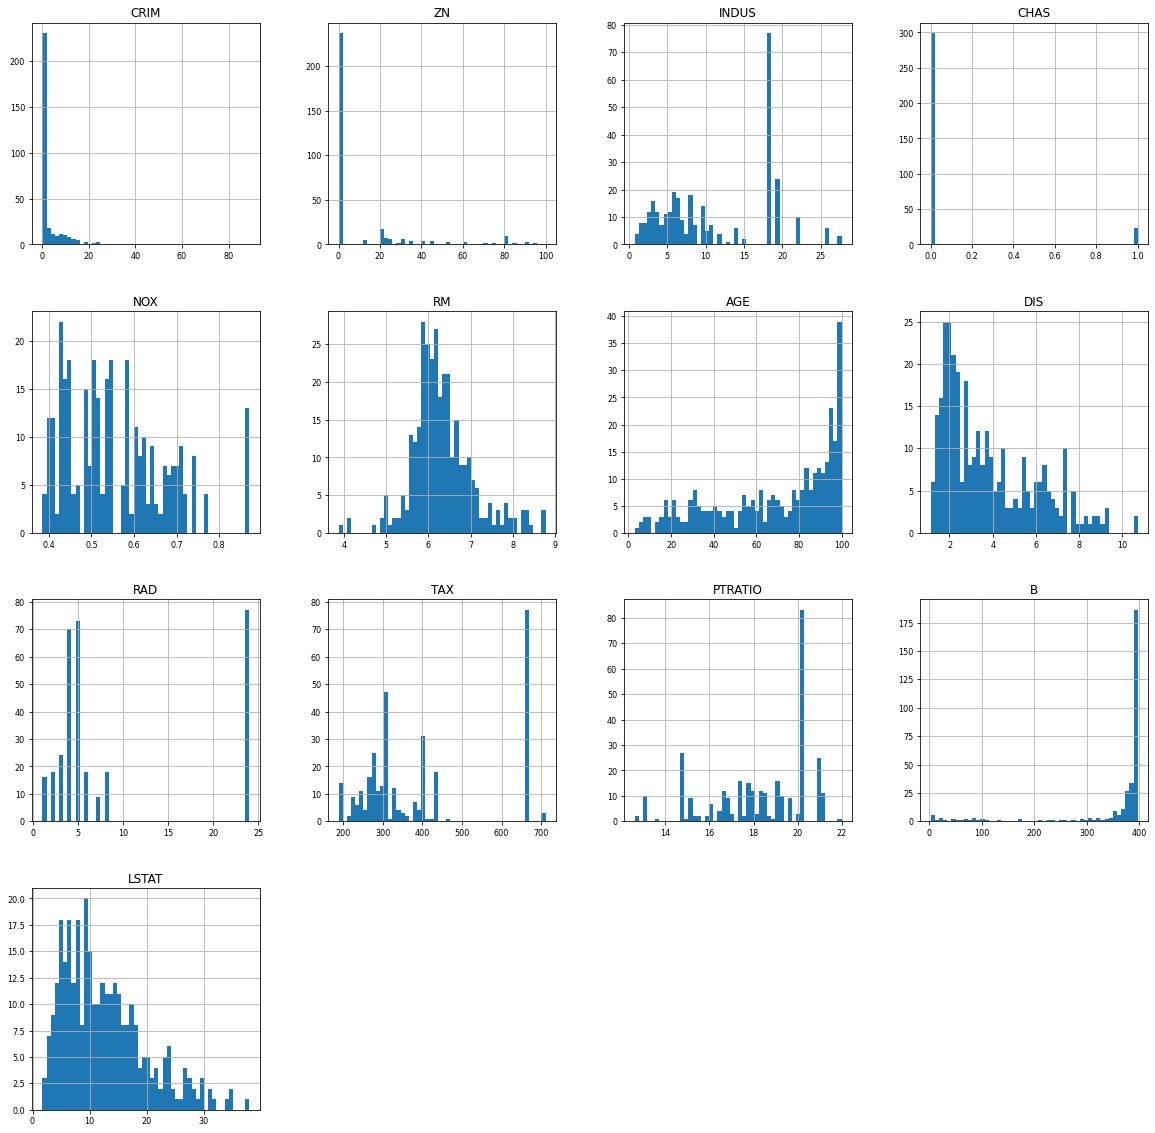

In [22]:
X_train.hist(figsize=(20, 20), bins=50, xlabelsize=8, ylabelsize=8); # produces one histogram per feature

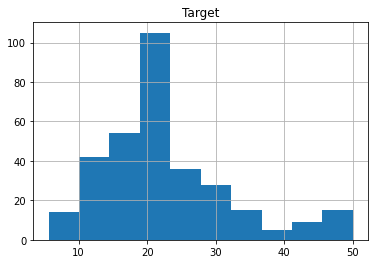

In [23]:
y_train.hist();

What insight did we gain, any suggestions?

Well, let's note a few potentially interesting observations about our data.
- many features display highly skewed distributions. Examples include `B`, `CRIM`, and `ZN`, and to lesser extent `AGE`.
- feature RM is the only feature that seems to be normally distributed. 
- our target variable looks quite normal. Good news. Linear regression likes normally distributed data.
- feature `CHAS` has only two values. It seems this is not a numeric but a categorical feature.
- the distribution of feature `RAD` suggests that this feature might better be translated into a categorical variable.
- ...

Observations like the above will inform your data preprocessing strategy. 

In addition to examining the distribution of one feature at a time, we can display a *heatmap* to check the pairwise correlation between features. Including the target variable in the analysis ensures that we also get an idea how strongly features are associated with the target.  

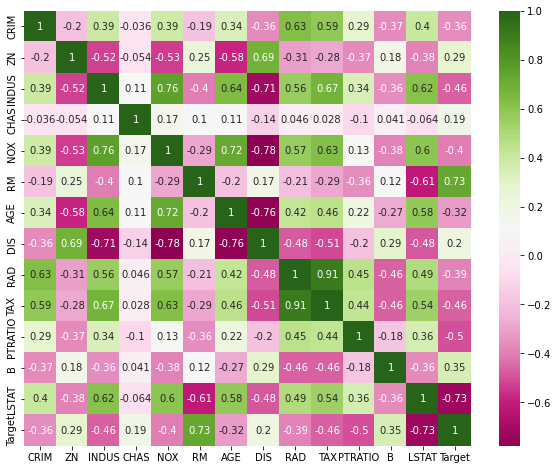

In [24]:
import seaborn as sns

fig, ax = plt.subplots(figsize=(10, 8))
# put y_train back into the pd df
full_data = X_train.copy()
full_data["Target"] = y_train.copy()
corr = full_data.corr()

sns.heatmap(corr,
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values,
            annot=True,
            cmap="PiYG");

There are a few variables which have quite a high correlation with other variables. For example, `DIS` is highly correlated with `INDUS`, `NOX` and `AGE`. In the regression, we can check if all of these variables end up being significant and if not, we can refine our regression to remove variables that contribute little information to the prediction. Examining the last row of the matrix, we see that several variables display relatively strong correlation with our target variable, for example `RM` and `LSTAT`. Based on this result, we can expect our regression to explain a large part of the variance of the target. We might also expect that the can predict the target well from the features. Pad yourself on the shoulder if you understand the subtle but crucial difference between the two previous statements.  

### Calculate OLS coefficients on the train set

Now that we have taken a good look at the data and ensured that it is appropriate for regression modeling, we can estimate our regression function. The library `statsmodels` provides a lot of OLS tools and great visualizations for this task. By printing the `.summary()` method of the fit results, we can easily see all the details of the regression.

In [25]:
import statsmodels.api as sm

model = sm.OLS(y_train, X_train)
results = model.fit()

print(results.summary())

                                 OLS Regression Results                                
Dep. Variable:                 Target   R-squared (uncentered):                   0.963
Model:                            OLS   Adj. R-squared (uncentered):              0.961
Method:                 Least Squares   F-statistic:                              617.6
Date:                Tue, 06 Sep 2022   Prob (F-statistic):                   8.75e-213
Time:                        10:40:54   Log-Likelihood:                         -962.44
No. Observations:                 323   AIC:                                      1951.
Df Residuals:                     310   BIC:                                      2000.
Df Model:                          13                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

In [26]:
results.mse_resid  

23.63112787223201

You could spend a lot of time on discussing the results. First, note the warning messages at the end of the output. They should not come as a surprise. The correlation matrix revealed high feature-to-feature correlation or, put differently, **multicollinearity**.  We can also see that quite a few variables are insignificant such as `INDUS`, `AGE`, `NOX`, `TAX`, `RAD` and `CRIM`. This fits into the picture. Multicollinearity should render variables insignificant. Another 'to be expected' result is that we have a very high (adjusted) R-square. Finally, the mean square error is a common measure to compare algorithm's success and here it is just under 25. The value itself is maybe not so telling. But we can compare it to that of an alternative model. 

Let's try improve our regression. It is good practice to remove the insignificant  variables as they may yield misleading coefficients for other variables.  Note that variable `ZN` also becomes insignificant in the reduced model, so it has been removed as well in the below code.

In [27]:
features_tuned = ['CHAS', 'RM', 'DIS', 'PTRATIO', 'B', 'LSTAT']  # reduced set of features

model_tuned = sm.OLS(y_train, X_train[features_tuned])  # re-estimate regression
results_tuned = model_tuned.fit()

print(results_tuned.summary())

                                 OLS Regression Results                                
Dep. Variable:                 Target   R-squared (uncentered):                   0.961
Model:                            OLS   Adj. R-squared (uncentered):              0.960
Method:                 Least Squares   F-statistic:                              1294.
Date:                Tue, 06 Sep 2022   Prob (F-statistic):                   1.40e-219
Time:                        10:40:54   Log-Likelihood:                         -971.08
No. Observations:                 323   AIC:                                      1954.
Df Residuals:                     317   BIC:                                      1977.
Df Model:                           6                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

In [28]:
results_tuned.mse_resid

24.379158703543677

Now we see that all variables are significant (i.e., p-values of 0.05 or below). Removing features has not changed R-square much. The average error is also not too much different in the new regression after removing some features. However, the F-stat is much higher in this regression. The F-stat in a regression is the chance that all regression coefficients are equal to zero if it is closer to 0. In other words, the model has no predictive capability. This all indicates that removing these variables may remove noise from our regression and yield better predictions. AIC and BIC figures also support this interpretation.

### Testing the model candidates based on the dev set

Let's use the dev data set to see whether the parsimonious model holds up well. If not, we should stick with the full-fledged one.

In [29]:
# These are the predictions on the dev set
results_dev = results.predict(X_dev)
print(results_dev)

results_dev_tuned = results_tuned.predict(X_dev[features_tuned])
print(results_dev_tuned)

37     21.709109
107    21.297250
130    23.074565
432    19.226272
404     7.678712
         ...    
441    19.519981
499    17.693753
206    23.771754
345    17.175343
160    30.511631
Length: 81, dtype: float64
37     21.649000
107    20.289458
130    22.933420
432    18.542433
404     9.836179
         ...    
441    19.733386
499    17.634355
206    23.547111
345    19.548248
160    31.744822
Length: 81, dtype: float64


In [30]:
residuals_sq_dev = (np.vstack(results_dev) - y_dev) ** 2
MSE_dev = np.sum(residuals_sq_dev) / X_dev.shape[0]
residuals_sq_dev_t = (np.vstack(results_dev_tuned) - y_dev) ** 2
MSE_dev_t = np.sum(residuals_sq_dev_t) / X_dev.shape[0]

print('all features on dev set: '+str(MSE_dev))
print('reduced features on dev set: '+str(MSE_dev_t))

all features on dev set: Target    25.797088
dtype: float64
reduced features on dev set: Target    26.477054
dtype: float64


The mean squared errors are quite close, confirming what we saw for the training set. We continue with the parsimonious model. 

### How about generalization? The evaluation on the (held out) test set


Now that we have split the data into two equally sized chunks, training and test data, we can fit a model with one set of the data. We will then use our model to predict on the training data and check the mean square error.

We see that the mean square error of this data is much smaller than the previous mean square error. This could be the result of less samples for the coefficients to be drawn from which is causing some bias in the model. We can check if the MSE from the test data is closer to the original regression value of about 25.

In [31]:
results_test = results_tuned.predict(X_test[features_tuned])

print(results_test)

173    27.440051
274    33.441429
491    18.183558
72     23.702530
452    20.024790
         ...    
412    -4.245190
436    14.629915
411    14.609760
86     20.788661
75     23.970760
Length: 102, dtype: float64


In [32]:
residuals_sq_test = (np.vstack(results_test) - y_test) ** 2

MSE_test = np.sum(residuals_sq_test) / X_test.shape[0]

print( 'test data MSE: ' + str(MSE_test))
print( 'train data MSE from above: ' + str(results_tuned.mse_resid)) 

test data MSE: Target    30.31908
dtype: float64
train data MSE from above: 24.379158703543677


We see that the mean square error in the test data is higher compared to that calculated on the training data (which was 24.4, s.a.). Note the pattern: training error < test error. That is typical in predictive modeling. 

## Alternatives to Linear Regression

Don't confuse the regression problems with linear regression! There's a plethora of approaches dealing with regression tasks. Let's take a quick look at the sklearn's documentation. Here is a quick example of decision trees applied to a regression problem (fitting a sine wave).

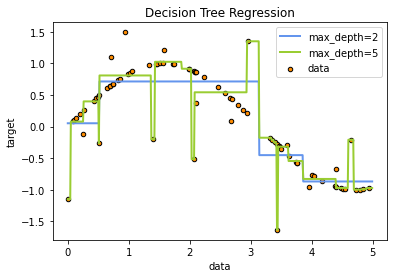

In [33]:
import numpy as np
from sklearn.tree import DecisionTreeRegressor
import matplotlib.pyplot as plt

# Create a random dataset
rng = np.random.RandomState(1)
X = np.sort(5 * rng.rand(80, 1), axis=0)
y = np.sin(X).ravel()
y[::5] += 3 * (0.5 - rng.rand(16))

# Fit regression model
regr_1 = DecisionTreeRegressor(max_depth=2)
regr_2 = DecisionTreeRegressor(max_depth=5)
regr_1.fit(X, y)
regr_2.fit(X, y)

# Predict
X_test = np.arange(0.0, 5.0, 0.01)[:, np.newaxis]
y_1 = regr_1.predict(X_test)
y_2 = regr_2.predict(X_test)

# Plot the results
plt.figure()
plt.scatter(X, y, s=20, edgecolor="black", c="darkorange", label="data")
plt.plot(X_test, y_1, color="cornflowerblue", label="max_depth=2", linewidth=2)
plt.plot(X_test, y_2, color="yellowgreen", label="max_depth=5", linewidth=2)
plt.xlabel("data")
plt.ylabel("target")
plt.title("Decision Tree Regression")
plt.legend()
plt.show()

# Classification

The lecture will introduce two flavors of predictive modeling, regression and classification. So far, we have focused on regression. Recall that classification differs from regression in the scaling of the target variable. Regression assumes a numeric target variable, like sales, whereas classification assumes a discrete target. 

A surprisingly large number of real-life (business) problems can be framed as a two-class classification problem. 

For simplicity, we consider this *two-class* or *binary* setting in the following. To facilitate plotting our data, we will further focus on a two-dimensional setting, meaning that each data points is characterized by two features or, if you prefer, (independent) variables. Assume you want to predict whether a machine is going to break in the next week. Break or do not break are the two possible states (i.e., classes). The features could then be the temperature of the machine and the time since when it has been running.

## Synthetic data generation for classification problems in sklearn

`sklearn` offers quite a few options for generating synthetic data. You can check out all of the options [here](https://scikit-learn.org/stable/modules/classes.html#samples-generator). 

For this course, the most interesting functions will be
*   `make_blobs`
*   `make_regression`
*   `make_classication`


In [34]:
from sklearn.datasets import make_blobs, make_regression, make_classification

### make_classification

The function `make_classification` initially creates clusters of normally distributed points and assigns an equal number of clusters to each class. Afterwards, interdependence in features and various types of noise are added. You can add informative, redundant and repeated features with `n_informative` , `n_redundant` and `n_repeated` respectively. Like the previous function, the number of classes can be adjusted using `n_class` and their distance from one another can be adjusted using `class_sep`. Reproducibility is again controlled by `random_state`. Check the [documentation](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_classification.html#sklearn.datasets.make_classification) for more settings.

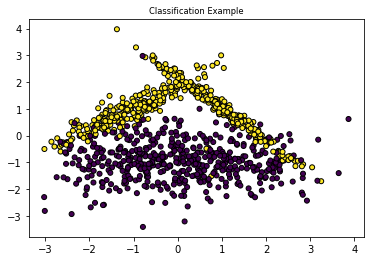

In [35]:
plt.title("Classification Example", fontsize='small')
X_class, y_class = make_classification(n_samples=1000, n_features=2, n_redundant=0, random_state=888)
plt.scatter(X_class[:, 0], X_class[:, 1], marker='o', 
            c=y_class, s=25, edgecolor='k'); # feature 1 on x, feature 2 on y and color by target

Provided you did not change our demo code, you will see a situation in which a linear classifier could no longer separate the data well. More precisely, the true relationship between the feature values and the class labels is nonlinear and, therefore, a linear classifier cannot produce a *good* separation of the data. 

Looking at the data, however, a quadratic classifier should be able to solve the classification problem. It is a bit too early to test this hypothesis, but feel very free to give it a try if you feel up for the task ;) 

## A benchmark model for classification tasks: Logistic regression
We learned from the lecture that the logistic regression model, or, in brief, logit model is the 'go-to' model for regression problems with a discrete target variable. Such problems are called classification problems. Formally speaking, logistic regression belongs to the wider family of **generalized linear models (GLM)**. It is a generalization of a linear regression model in that it embodies the well-known linear form $\beta^{\top} x$ and adds a (non-linear) **link function** that connects the linear form to the target variable. In the case of logistic regression, the link function is the logistic function. Other GLMs use different link functions, but these are out of scope. So let us first examine the logistic function.

## The logistic function
We implement the logistic function as a custom Python function and then generate some data to plot the function over the interval [-4, -3, ..., 4]. 
Recall that the form of the function for input variable $z$ is $f(z) = \frac{1}{1 + \exp^{-z}}$. 

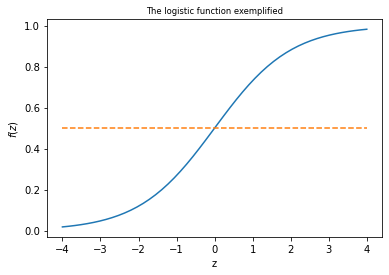

In [36]:
# we implement the logistic function as a custom function
def logistic_fun(z):
    return 1/(1+np.exp(-z))


# create some data for plotting
z = np.linspace(-4, 4)

fz = logistic_fun(z)
plt.title("The logistic function exemplified", fontsize='small')
plt.plot(z, fz);
plt.plot(z, np.repeat(0.5, len(z)), "--");  #  just for fun, add a horizontal line to highlight 0.5
plt.ylabel("$f(z)$")
plt.xlabel("z")
plt.show()

## Maximum likelihood estimation & gradient descent
Estimating a logistic regression model involves minimizing the negative **log-likelihood** function. We discussed the maximum likelihood approach in the lecture. However, experience suggests that some students find this part a little hard  to digest, probably because of its level of formality. We will try to demystify the model by implementing it from scratch. For starters, however, recall that logistic regression models the probability of observing a certain state of our target variable $y$ by means of the logistic function. Assuming a zero-one coded binary target variable $y \in {0, 1}$, we can write the logit model as follows:

$$ p \left( y=1|x \right) = \frac{1}{1+e^{-z}}, \text{  and  }  p \left( y=0|x \right) = 1- p \left( y=1|x \right) $$

We define $z$ as a linear, additive function of the features $x$: 
$$ z = \hat{\beta}^{\top}x $$. 

Note that in the above equation, we assume for notational convenience that the feature vector $x$ includes a constant. This way, we do not need to explicitly consider the intercept. Assuming our data fulfills the IID assumption, we can write the log-likelihood function: 

$$ \mathcal{L} = \sum^{n}_{i=1} \left[ y_i \log \left(p \left( y=1|x \right) \right) + \left(1-y_i\right) \log \left(1-p \left( y=1|x \right) \right)\right]. $$

Now we need to find the values of $ \hat{\beta} $ that minimize this function. To that end, we calculate the derivative of the log likelihood function with respect to $ \hat{\beta} $. We calculate this derivative using the chain rule:

$$ \frac{\partial \mathcal{L}}{\partial \hat{\beta_j}} = \frac{\partial \mathcal{L}}{\partial p} \cdot \frac{\partial p}{\partial z} \cdot \frac{\partial z}{\partial \hat{\beta}} $$

Let's first calculate the three derivatives which we will need on the right hand side:

\begin{align*} 
\frac{\partial \mathcal{L}}{\partial p} &= \frac{y}{p} - \frac{1-y}{1-p} \\
\frac{\partial p}{\partial z} &= \frac{1}{1+e^{-z}} \cdot  \Bigg( 1 - \frac{1}{1+e^{-z}} \Bigg) = \Big( p \cdot  \big( 1 - p \big) \Big) \\
\frac{\partial z}{\partial \hat{\beta}} &= x
\end{align*}


Now we can multiply these three together to find the derivative of the log likelihood function with respect to $ \hat{\beta} $ :
 
\begin{align*}
 \frac{\partial \mathcal{L}}{\partial \hat{\beta}} &= \frac{\partial \mathcal{L}}{\partial p} \cdot \frac{\partial p}{\partial z} \cdot \frac{\partial z}{\partial \hat{\beta}} \\
 &= \Big( \frac{y}{p} - \frac{1-y}{1-p} \Big) \cdot \Big( p \cdot  \big( 1 - p \big) \Big) \cdot x \\
 &= (y(1-p) - p(1-y)) \cdot x \\ 
 &= (y - p) \cdot x
\end{align*}

And voilà! At the end, we have a much simpler formula to deal with:
$$ \frac{\partial \mathcal{L}}{\partial \hat{\beta}} = (y - p \left( y=1|x \right) ) \cdot x $$

The next step is to equate our derivate of zero and solve for the unknown parameter vector $\hat{\beta}$. However, different from linear regression, it turns out that there is no analytical solution. Therefore, we need to use another approach to find the optimal values of $\hat{\beta}$, that is the values that maximize the likelihood function.

**Gradient descent** is the process of iteratively making changes to $ \hat{\beta} $ to assess which values lower the derivative value and, therefore, hopefully brings us closer to a minimum. Note that this may unfortunately not be the global minimum of the function but rather a local minimum. This is especially true if we have many coefficients or if any relationships are very complicated.

Additionally, if we change $ \hat{\beta} $ by too much in one iteration, we may end up overshooting a minimum which is counterproductive. In order to avoid this, we multiply the total difference by the learning rate $ \eta $ to dampen the update to $ \hat{\beta} $. If the learning rate is too low however, we may end up sabotaging ourselves as the function loses too much momentum in its updates. It is a good idea to experiment with a few different rates to see which one works best with your data.

Here is an equation which represents gradient descent:
$$ \hat{\beta}_j = \hat{\beta}_{j-1} - \eta \frac{\partial \mathcal{L}}{\partial \hat{\beta}_{j-1}} $$

whereby we use the index $j$ to refer to individual iterations. For example, the above equation states how a new value of 
$\hat{\beta}_j$ depends on the value calculated in the previous iteration $\hat{\beta}_{j-1}$. Also note how our update rule embodies the value of our regression coefficients from the previous iteration with the gradient of our loss function $\mathcal{L}$ with respect to $\hat{\beta}_{j-1}$. Essentially, the above equation says that, to update our regression parameters $\hat{\beta}$, take their values from the previous iteration and change these in the direction of the negative of the gradient, which is the direction in that our loss function decreases the most. The degree to which the new values of $\hat{\beta}$ depend on the previous values and the gradient, in other words the magnitude of the update, depend on the parameter $\eta$, which is called the learning rate. 

For a more detailed explanation, check out the [Wikipedia page for *gradient descent*](https://en.wikipedia.org/wiki/Gradient_descent). It will be crucial for you to understand this process, so take advantage of online resources to improve your understanding. There are also many ways to modify this process like stochastic gradient descent or adaptive learning rates which you might come across in future studies.

Let's use sklearn to fit a logistic regression based on the simulated data:

Text(0, 0.5, '$x_2$')

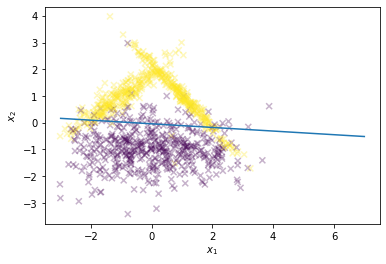

In [37]:
# logistic regression with sklearn
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(penalty='none', fit_intercept=True)
model.fit(X_class, y_class)

# Write code to create a two-dimensional plot of the data and how the logistic regression separates the two classes
w = model.coef_[0]
xx = np.linspace(-3,7)

a = -w[0] / w[1]
b = -model.intercept_[0] / w[1]

yy = a * xx + b

fig = plt.figure()
plt.scatter(X_class[:,0], X_class[:,1], c=y_class, alpha=.3, marker='x')
plt.plot(xx,yy, label="logit model")
plt.xlabel("$x_1$")
plt.ylabel("$x_2$")
# simpplt.legend(loc='best');

In [38]:
# first look at a crude model evaluation metric
classify_correct = model.predict(X_class) == y_class
accuracy = classify_correct.mean()

accuracy

0.887

Let's do the same for another model that can be used in classification tasks: the decision tree.

## Decision Trees for Classification with sklearn

The sklean library supports tree-based algorithms, which of course are a lot easier to use compared to coding a tree algorithm from scratch. 

In [39]:
from sklearn import tree

clf = tree.DecisionTreeClassifier(criterion="entropy", min_samples_split=2, max_depth=2) # example of a shallow tree
dt_shallow = clf.fit(X_class, y_class)

In [40]:
classify_correct_shallow = dt_shallow.predict(X_class) == y_class
accuracy_shallow = classify_correct_shallow.mean()


accuracy_shallow

0.897

## A small Classification Example on Real World Data

Let's put the credit data set to use again...

In [52]:
# real world example with train / dev / test split
df = pd.read_csv('../data/hmeq_modeling.csv', index_col="index")
df.head(5) 

# Split data into target and features
pd_X = df.drop(['BAD'], axis=1) 
pd_y = df['BAD'].astype(int)  # also make the target an integer value

X_traindev, X_test, y_traindev, y_test = train_test_split( pd_X, pd_y, test_size=0.2, random_state=42)
X_train, X_dev, y_train, y_dev = train_test_split( X_traindev, y_traindev, test_size=0.2, random_state=42)

X_train.head()  # first 5 rows of the data set

,LOAN,MORTDUE,VALUE,YOJ,CLAGE,NINQ,CLNO,DEBTINC,DEROGzero,REASON_HomeImp,REASON_IsMissing,JOB_Office,JOB_Other,JOB_ProfExe,JOB_Sales,JOB_Self,DELINQcat_1,DELINQcat_1+
index,,,,,,,,,,,,,,,,,,
252,-1.356699,0.047291,-0.638446,-0.668103,-0.252498,-0.826792,0.216955,1.579747,False,1,0,0,0,0,1,0,0,0
5810,2.545249,2.256898,2.246622,-0.524274,-2.285277,-0.826792,-2.054692,0.137456,True,1,0,0,0,0,0,1,0,0
860,-1.010820,0.215104,-0.407252,1.633167,2.209307,-0.065054,2.326342,-0.728624,True,1,0,0,1,0,0,0,0,0
1303,-0.827072,-0.806807,-0.584201,0.482532,-0.937975,2.981897,-0.648434,1.219924,True,0,0,0,1,0,0,0,0,0
3673,0.134904,-0.887710,0.067592,-0.668103,-0.489491,-0.826792,-0.756608,-0.412265,True,1,0,0,1,0,0,0,0,0


In [51]:
# fit simple tree and logistic reg on train set
# tree
tr = tree.DecisionTreeClassifier(criterion='gini', max_depth=5)
tr.fit(X_train, y_train)
# logistic regression
logit = LogisticRegression(penalty='none', fit_intercept=True)
logit.fit(X_train, y_train)

LogisticRegression(penalty='none')

It would be more typical to tune hyperparameters on the dev set. For now, let's just select from the two model candidates "decision tree" and "logistic regression". 

In [73]:
# evaluate on dev set, use ROCAUC
from sklearn import metrics  # Important lib where we find various performance measures

# check help on the scores
print('dec. tree regr ROCAUC score on dev: ' +  str(metrics.roc_auc_score(y_dev, tr.predict_proba(X_dev)[:,1])) )
print('logistic regr ROCAUC score on dev: ' +  str(metrics.roc_auc_score(y_dev, logit.predict_proba(X_dev)[:,1])) )

print('dec. tree regr F1 score on dev: ' +  str(metrics.roc_auc_score(y_dev, tr.predict(X_dev))) )
print('logistic regr F1 score on dev: ' +  str(metrics.roc_auc_score(y_dev, logit.predict(X_dev))) )


dec. tree regr ROCAUC score on dev: 0.846251633986928
logistic regr ROCAUC score on dev: 0.7991307189542484
dec. tree regr F1 score on dev: 0.7830588235294118
logistic regr F1 score on dev: 0.6020980392156863


The Tree model performs better on the dev set. We can hope it generalizes well on the held out test set, too. Let's select the decision tree as our official "production" model and take a look ... 

In [76]:
# line up train, dev and test metrics for the tree
print('dec. tree regr ROCAUC score on train: ' +  str(metrics.roc_auc_score(y_train, tr.predict_proba(X_train)[:,1])) )
print('dec. tree regr ROCAUC score on test: ' +  str(metrics.roc_auc_score(y_test, tr.predict_proba(X_test)[:,1])) )

print('dec. tree regr F1 score on train: ' +  str(metrics.roc_auc_score(y_train, tr.predict(X_train))) )
print('dec. tree regr F1 score on test: ' +  str(metrics.roc_auc_score(y_test, tr.predict(X_test))) )



dec. tree regr ROCAUC score on train: 0.8886996785893844
dec. tree regr ROCAUC score on test: 0.8690195599519652
dec. tree regr F1 score on train: 0.8263839510163039
dec. tree regr F1 score on test: 0.8099550182166045


We observe only a slight decrease in model performance of the tree. Pretty neat
